In [2]:
from scipy.ndimage import correlate
import numpy as np
input_img = np.arange(25).reshape(5, 5)
print(input_img)
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]
res_img = correlate(input_img, weights)
print(res_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


## Exercise 1


In [4]:
print(res_img[3, 3])

#The value is 108 because the value in position (3, 3) is calculated
#by the sum of the product of the input image and the weights.
#The value in position (3, 3) is calculated as follows:
val = 12*0 + 13*1 + 14*0 + 17*1 + 18*2 + 19*1 + 22*0 + 23*1 + 24*0
print(val)


108
108


## Exercise 2

In [6]:
res_img = correlate(input_img, weights, mode="constant", cval=10)
print(res_img)
res_img = correlate(input_img, weights, mode="reflect", cval=10)
print(res_img)
#The mode parameter specifies how the input array is extended when the filter overlaps a border.
# reflect: The input array is extended by reflecting about the edge of the last pixel.
# constant: The input array is extended by filling all values beyond the edge with the same constant value.

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]
[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


## Exercise 3

(450, 450, 3)
uint8


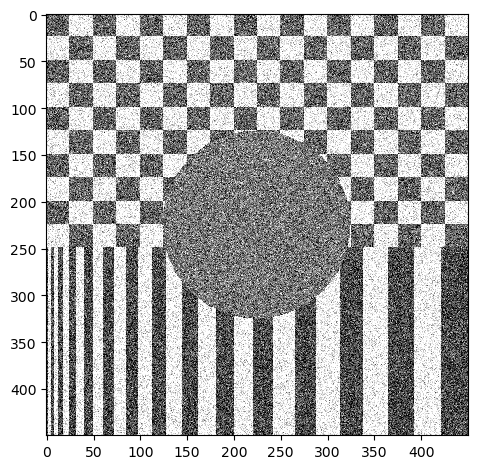

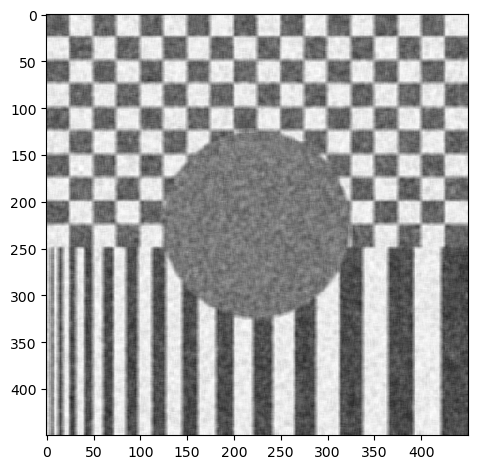

In [18]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

in_dir = "data/"

# X-ray image
im_name = "Gaussian.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

res_img = correlate(im_org, weights, mode="reflect")

# Display the original and the filtered image.
io.imshow(im_org)
io.show()
io.imshow(res_img) 
io.show()

## Exercise 4

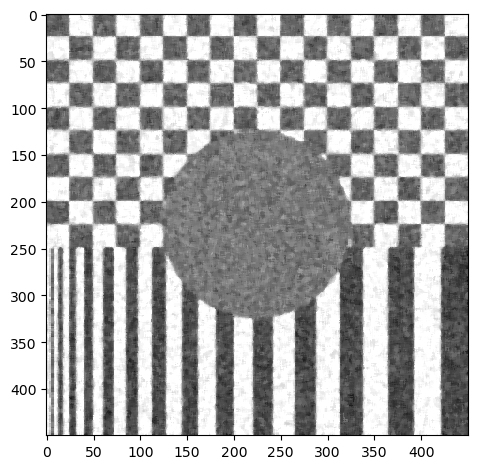

In [23]:
from skimage.filters import median
size = 5
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

io.imshow(med_img)
io.show()

## Exercise 5

(450, 450, 3)
uint8


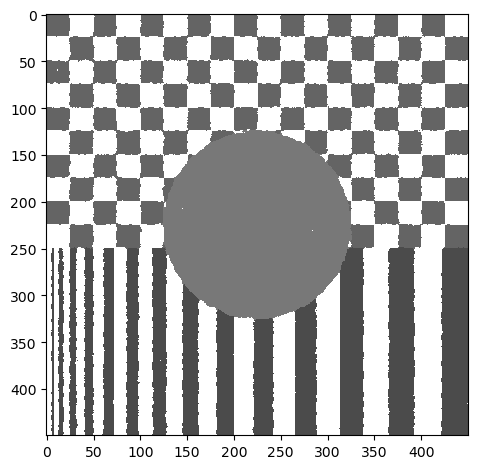

In [33]:
in_dir = "data/"

# X-ray image
im_name = "SaltPepper.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

size = 4
footprint = np.ones([size, size])
med_img = median(im_org, footprint)

io.imshow(med_img)
io.show()

## Exercise 6

(450, 450, 3)
uint8


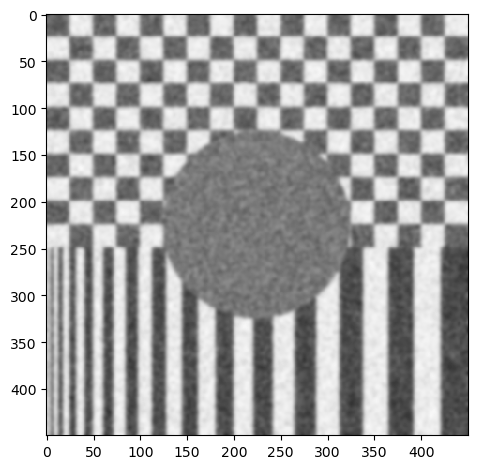

In [44]:
from skimage.filters import gaussian
in_dir = "data/"

# X-ray image
im_name = "Gaussian.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

sigma = 2
gauss_img = gaussian(im_org, sigma)


io.imshow(gauss_img)
io.show()

## Exercise 7

(647, 800, 3)
uint8


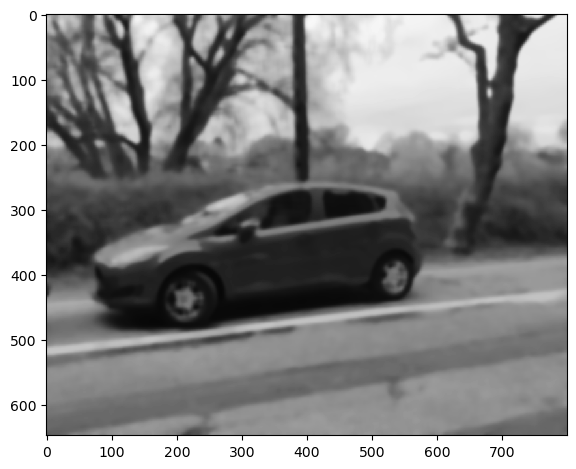

In [51]:
from skimage.filters import gaussian
in_dir = "data/"

# X-ray image
im_name = "car.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

size = 12
footprint = np.ones([size, size])
med_img = median(im_org, footprint)
sigma = 2
gauss_img = gaussian(med_img, sigma)


io.imshow(gauss_img)
io.show()

## Exercise 8

(500, 500, 3)
uint8


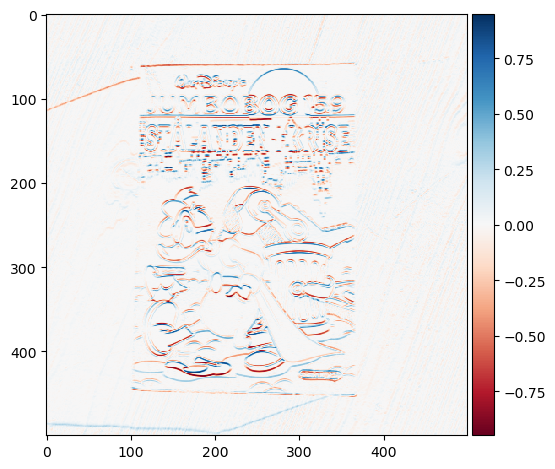

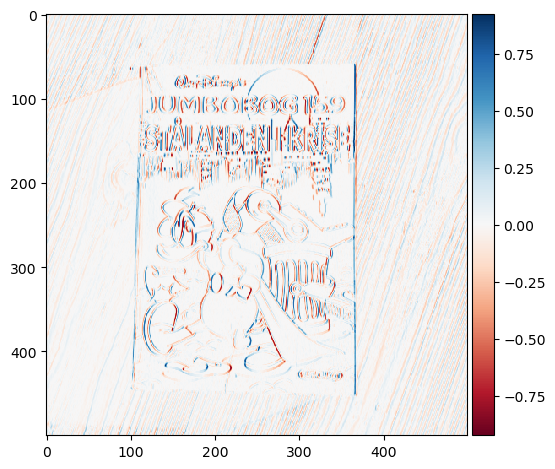

In [52]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

in_dir = "data/"

im_name = "donald_1.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

prewitt_h_img = prewitt_h(im_org)
prewitt_v_img = prewitt_v(im_org)


io.imshow(prewitt_h_img)
io.show()
io.imshow(prewitt_v_img)
io.show()

## Exercise 9

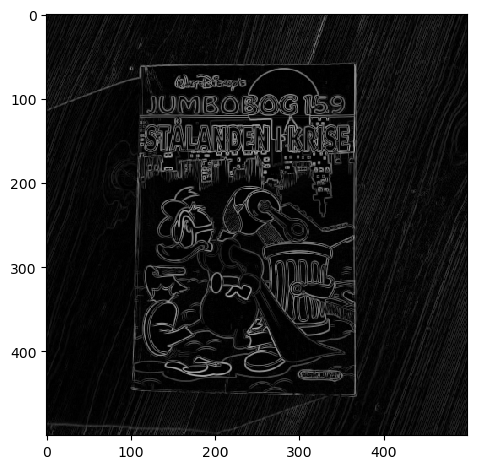

In [53]:
prewitt_img = prewitt(im_org)


io.imshow(prewitt_img)
io.show()


## Exercise 10

(512, 512, 3)
uint8


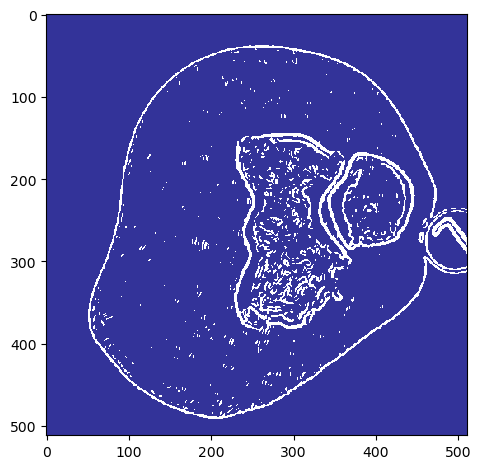

In [78]:
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
in_dir = "data/"

# X-ray image
im_name = "ElbowCTSlice.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

print(im_org.shape)
print(im_org.dtype)

# Convert the image to grayscale.
im_org = color.rgb2gray(im_org)

# filter with median filter
size = 2
footprint = np.ones([size, size])
med_img = median(im_org, footprint)
sigma = 1
gauss_img = gaussian(med_img, sigma)

# use prewitt filter
prewitt_img = prewitt(med_img)

# use otsu thresholding
otsu_thresh = threshold_otsu(prewitt_img)
binary_img = prewitt_img > otsu_thresh

edge_img = binary_img




min_val = edge_img.min()
max_val = edge_img.max()
io.imshow(edge_img, vmin=min_val, vmax=max_val, cmap="terrain")